In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow  import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('sign_mnist_train\sign_mnist_train.csv')
data.shape

(27455, 785)

In [4]:
Y = data['label']
X = data.drop('label', 1)

#Y.describe()


In [5]:
myDict = {0: 'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M',
          13: 'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'}

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing

normalizer = preprocessing.Normalizer().fit(X_train)
X_train    =    normalizer.transform(X_train) 
X_test     =   normalizer.transform(X_test)

#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)  

In [50]:
clf = MLPClassifier(hidden_layer_sizes = (10,10,10,10,10), random_state=1, max_iter=300, early_stopping=True).fit(X_train, y_train)

In [51]:
clf.score(X_test, y_test)

0.9719677739763823

In [57]:
Y_pred = clf.predict(X_test[:1, :])

In [2]:
type(Y_pred)

NameError: name 'Y_pred' is not defined

In [59]:
for i, val in enumerate(Y_pred):
    print(myDict.get(val))

Y


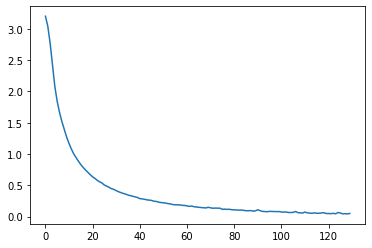

In [62]:
plt.plot(clf.loss_curve_)
#plt.plot(clf.validation_scores_)

In [63]:
from sklearn.model_selection import cross_val_score
scores  = cross_val_score(clf, X_train, y_train, cv=5)

In [64]:
print("genAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.02)


In [16]:
clf2 = clf = MLPClassifier(hidden_layer_sizes = (10,10,10,10,10), random_state=1, max_iter=300)

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
estimator = clf,
scoring = 'neg_log_loss',
X = X_train,
y = y_train, cv = 3)

In [66]:
print("training set size = ", len(train_sizes))
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

training set size =  5
Training scores:

 [[-3.19425886 -3.03485171 -3.03485171]
 [-0.22593761 -0.34578989 -0.34578989]
 [-0.34488419 -0.25136491 -0.14129537]
 [-0.229349   -0.06251978 -0.08922531]
 [-0.06722912 -0.05783618 -0.07670813]]

 ----------------------------------------------------------------------

Validation scores:

 [[-3.2055674  -3.06422918 -3.06317934]
 [-0.81924984 -0.93015381 -0.85344267]
 [-0.56461391 -0.38881329 -0.34555972]
 [-0.34877923 -0.18498167 -0.25395311]
 [-0.12630042 -0.09374993 -0.15730852]]


In [67]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

In [68]:
print("mean training scores = ", train_scores_mean)
print("mean val scores = ", validation_scores_mean)

mean training scores =  [3.08798743 0.30583913 0.24584816 0.12703136 0.06725781]
mean val scores =  [3.11099197 0.86761544 0.43299564 0.26257134 0.12578629]


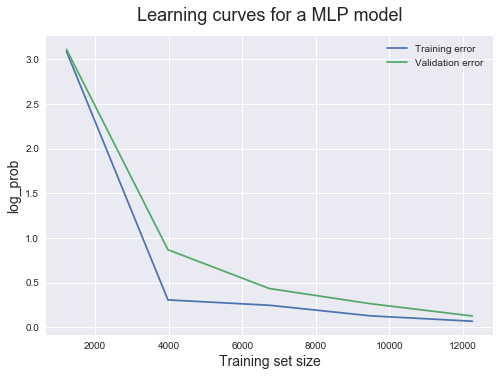

In [69]:


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('log_prob', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a MLP model', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(0,40)

In [71]:
import cv2

videoCaptureObject = cv2.VideoCapture(0)
result = True
while(result):
    ret,frame = videoCaptureObject.read()
    cv2.imshow("test", frame)
    k = cv2.waitKey(1)
    
    if k%256 == 27:
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        cv2.imwrite("input_image.jpg",frame)
        img = cv2.imread("input_image.jpg")
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
        gray_img = cv2.resize(gray_image, (28, 28)).reshape(1,784)
       # gray_img = normalizer.transform(gray_img)
        y_pred = clf.predict(gray_img)
        
        print("predicted alphabet  = ", y_pred)
        #text_to_audio(myDict.get(y_pred))
        
        result = False

        
videoCaptureObject.release()
cv2.destroyAllWindows()

predicted alphabet  =  [16]


TypeError: unhashable type: 'numpy.ndarray'

In [1]:
myDict.get(16)

NameError: name 'myDict' is not defined

In [46]:
import pyttsx3 
def text_to_audio(letter):
    # Initialize the converter 
    converter = pyttsx3.init() 

    # Set properties before adding 
    # Things to say 

    # Sets speed percent  
    # Can be more than 100 
    converter.setProperty('rate', 150) 
    # Set volume 0-1 
    converter.setProperty('volume', 0.7) 

    # Queue the entered text  
    # There will be a pause between 
    # each one like a pause in  
    # a sentence 
    converter.say(letter)
    #converter.say("Hello GeeksforGeeks") 
    #converter.say("I'm also a geek") 

    # Empties the say() queue 
    # Program will not continue 
    # until all speech is done talking 
    converter.runAndWait() 

MODEL 2 : CNN

In [8]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
X_train = np.array(X_train).reshape(-1,28,28,1)
X_test = np.array(X_test).reshape(-1,28,28,1)

In [9]:
X_train.shape

(18394, 28, 28, 1)

In [10]:
X_test.shape

(9061, 28, 28, 1)

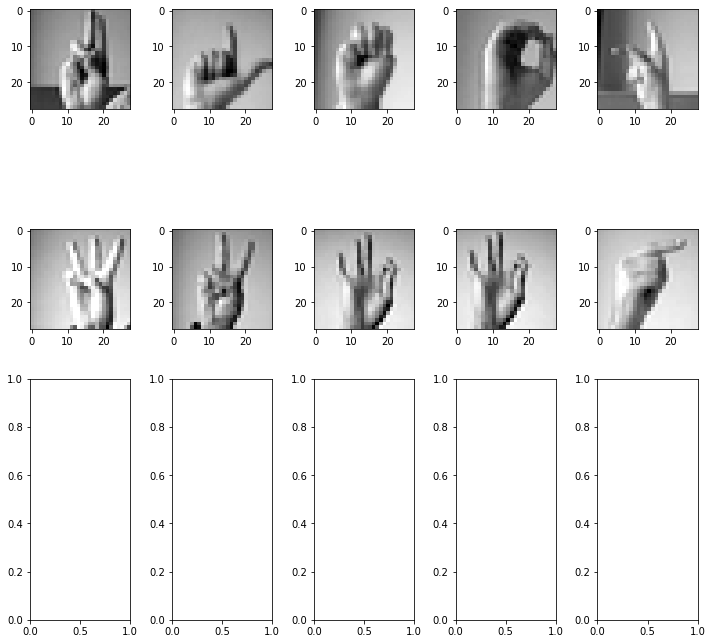

In [11]:
f, ax = plt.subplots(3,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()    

In [12]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [13]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0

In [14]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)



In [15]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [16]:
history = model.fit(datagen.flow(X_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (X_test, y_test) , callbacks = [learning_rate_reduction])

  ...
    to  
  ['...']
Train for 144 steps, validate on 9061 samples
Epoch 1/20
144/144 [==============================] - 58s 401ms/step - loss: 1.5062 - accuracy: 0.5390 - val_loss: 0.4309 - val_accuracy: 0.8775
Epoch 2/20
144/144 [==============================] - 58s 401ms/step - loss: 0.3634 - accuracy: 0.8801 - val_loss: 0.3957 - val_accuracy: 0.8630
Epoch 3/20
144/144 [==============================] - 55s 381ms/step - loss: 0.1828 - accuracy: 0.9391 - val_loss: 0.0802 - val_accuracy: 0.9737
Epoch 4/20
144/144 [==============================] - 57s 398ms/step - loss: 0.1100 - accuracy: 0.9647 - val_loss: 0.0420 - val_accuracy: 0.9858
Epoch 5/20
144/144 [==============================] - 56s 390ms/step - loss: 0.0794 - accuracy: 0.9739 - val_loss: 0.1205 - val_accuracy: 0.9609
Epoch 6/20
144/144 [==============================] - 55s 383ms/step - loss: 0.0583 - accuracy: 0.9813 - val_loss: 0.0120 - val_accuracy: 0.9966
Epoch 7/20
144/144 [==============================] - 55s 3

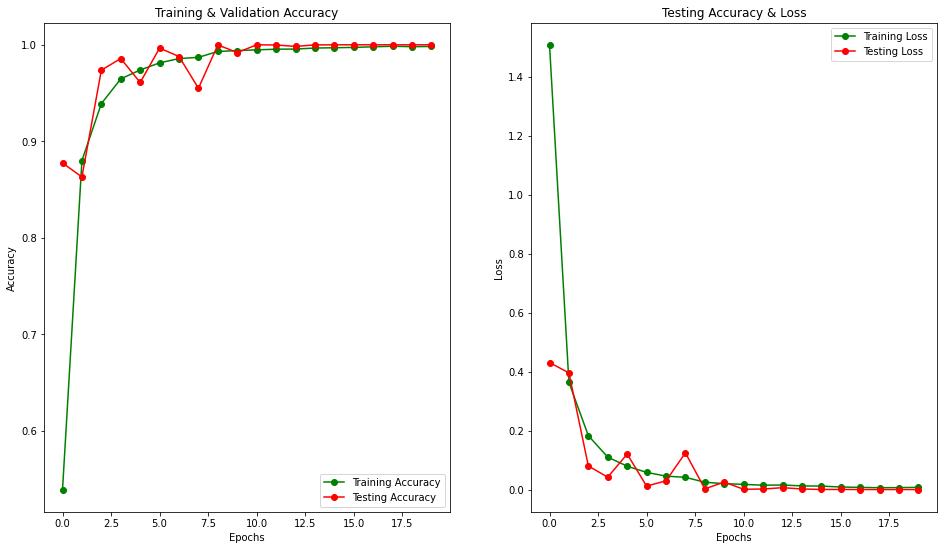

In [17]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [18]:
predictions = model.predict_classes(X_test)

In [19]:
#model.save_weights("Sign_detection_model.h5")
model.save('Sign_detection.h5')

In [21]:
from tensorflow import keras
model = keras.models.load_model('Sign_detection.h5')

In [26]:
#model.predict_classes(X_test)
model.predict_classes(test)

array([23], dtype=int64)

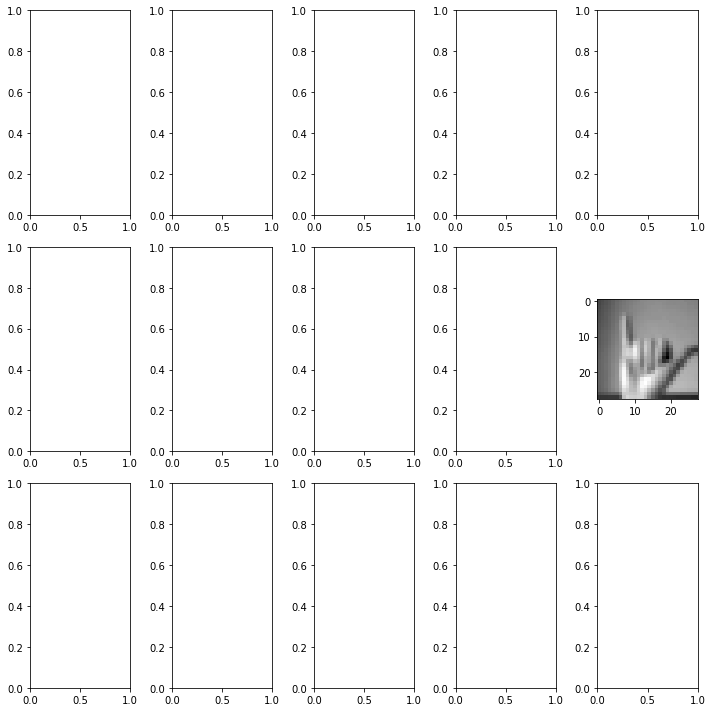

In [24]:
test = X_test[:1]

f, ax = plt.subplots(3,5) 
f.set_size_inches(10, 10)
ax[i,j].imshow(test.reshape(28, 28) , cmap = "gray")
#k += 1
plt.tight_layout() 


In [20]:
predictions = model.predict_classes(test)

In [23]:
import pyttsx3 
def text_to_audio(letter):
    # Initialize the converter 
    converter = pyttsx3.init() 

    # Set properties before adding 
    # Things to say 

    # Sets speed percent  
    # Can be more than 100 
    converter.setProperty('rate', 150) 
    # Set volume 0-1 
    converter.setProperty('volume', 0.7) 

    # Queue the entered text  
    # There will be a pause between 
    # each one like a pause in  
    # a sentence 
    converter.say("letter indicated through sign language is")
    converter.say(letter)
    #converter.say("Hello GeeksforGeeks") 
    #converter.say("I'm also a geek") 

    # Empties the say() queue 
    # Program will not continue 
    # until all speech is done talking 
    converter.runAndWait() 

ModuleNotFoundError: No module named 'pyttsx3'

In [51]:
import cv2

videoCaptureObject = cv2.VideoCapture(0)
result = True
while(result):
    ret,frame = videoCaptureObject.read()
    cv2.imshow("test", frame)
    k = cv2.waitKey(1)
    
    if k%256 == 27:
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        cv2.imwrite("input_image.jpg",frame)
        img = cv2.imread("input_image.jpg")
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
        gray_img = cv2.resize(gray_image, (28, 28)).reshape(1,28,28,1)
        #ax[2,1].imshow(gray_img.reshape(28, 28) , cmap = "gray")
        cv2.imshow("image", gray_img.reshape(28, 28))
        y_pred =  model.predict_classes(gray_img)
        print("predicted alphabet  = ", y_pred) 
        text_to_audio(myDict.get(y_pred[0]))
        
        result = False

        
videoCaptureObject.release()
cv2.destroyAllWindows()

predicted alphabet  =  [23]


In [50]:
cv2.imshow("image", gray_img.reshape(28, 28))

In [48]:
import scipy.misc
rgb = scipy.misc.toimage(np_array)

AttributeError: module 'scipy.misc' has no attribute 'toimage'

In [45]:
x

'O'

In [53]:
text_to_audio(14)

In [56]:
import time

In [58]:
from time import time
import cv2

# Create a new VideoCapture object
cam = cv2.VideoCapture(0)

# Initialise variables to store current time difference as well as previous time call value
previous = time()
delta = 0

# Keep looping
while True:
    # Get the current time, increase delta and update the previous variable
    current = time()
    delta += current - previous
    previous = current

    # Check if 3 (or some other value) seconds passed
    if delta > 10:
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
        gray_img = cv2.resize(gray_image, (28, 28)).reshape(1,28,28,1)
        y_pred =  model.predict_classes(gray_img)
        print("predicted alphabet  = ", y_pred)
        text_to_audio(myDict.get(y_pred[0]))
        
        delta = 0

    # Show the image and keep streaming
    _, img = cam.read()
    cv2.imshow("Frame", img)
    cv2.waitKey(1)

predicted alphabet  =  [15]
predicted alphabet  =  [14]
predicted alphabet  =  [14]
predicted alphabet  =  [7]
predicted alphabet  =  [7]
predicted alphabet  =  [7]
predicted alphabet  =  [7]
predicted alphabet  =  [14]
predicted alphabet  =  [7]
predicted alphabet  =  [14]
predicted alphabet  =  [5]
predicted alphabet  =  [14]
predicted alphabet  =  [14]
predicted alphabet  =  [14]
predicted alphabet  =  [14]


KeyboardInterrupt: 

In [1]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.
